### Klinik Pintar
**Tujuan**
- Memahami data persebaran penyakit di lokasi dan waktu tertentu <br>
Sebagai pertimbangan bagi Klinik Pintar menentukan prioritas perancangan layanan kesehatan yang disediakan oleh klinik dan farmalkes yang cocok untuk ditawarkan ke klinik di area tersebut 
- Memahami data penggunaan jenis pembayaran dan korelasinya dengan penyakit yang ditangani <br>
Sebagai pertimbangan bagi Klinik Pintar menentukan prioritas pengembangan aplikasi yang mendukung proses pelayanan di fasyankes dengan jenis pembayaran dan penyakit tertentu.
- Eksplorasi data <br>
Insight tambahan yang memberikan value terhadap unit bisnis Klinik Pintar mencakup dan tidak terbatas prediksi data di waktu akan datang.

**Dataset :**
- registration_created_at: Waktu kunjungan/registrasi pasien
- patient_financing : Jenis pembayaran yang digunakan pasien saat kunjungan
- patient_insurance : Nama asuransi/penjamin yang digunakan pasien saat kunjungan
- clinic_regency : Lokasi kota/kabupaten klinik yang dikunjungi pasien
- clinic_province : Lokasi provinsi klinik yang dikunjungi pasien
- patient_birth_date : Tanggal lahir pasien
- patient_gender Jenis kelamin pasien
- patient_smoke : Status merokok pasien
- patient_blood_type : Golongan darah pasien
- medical_record_created_at : Tanggal resume medis dibuat
- icd_10 : Kode diagnosis penyakit yang ditetapkan setelah konsultasi dokter
- patient_id : id pasien yang berkunjung ke klinik


### Import Library

In [1]:
#import library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [2]:
#import dataset
df = pd.read_csv('Penyakit Pasien.csv')
df.head()

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,medical_record_created_at,icd_10
0,2019-02-01 14:52:29,Pribadi,NaN,DKI Jakarta,Kota Jakarta Barat,28cd2e70-25f6-11e9-ac7e-45f1bbbf3753,1997-05-25,Female,Not smoking,NaN,2019-02-01 14:53:51,Demam tifoid
1,2019-02-04 9:48:30,Pribadi,NaN,DKI Jakarta,Kota Jakarta Barat,eb9e5cb0-2826-11e9-83a9-4f96e4a4398f,1990-01-01,Female,Not smoking,NaN,2019-02-04 9:49:29,Demam tifoid
2,2019-02-04 11:59:54,Pribadi,NaN,DKI Jakarta,Kota Jakarta Barat,28cd2e70-25f6-11e9-ac7e-45f1bbbf3753,1997-05-25,Female,Not smoking,NaN,2019-02-04 12:00:38,Cholera
3,2019-02-04 11:59:54,Pribadi,NaN,DKI Jakarta,Kota Jakarta Barat,28cd2e70-25f6-11e9-ac7e-45f1bbbf3753,1997-05-25,Female,Not smoking,NaN,2019-02-04 12:00:38,"Cholera due to Vibrio cholerae 01, biovar chol..."
4,2019-02-26 12:01:11,Pribadi,NaN,Banten,Kabupaten Pandeglang,447a4040-3983-11e9-917a-c580f9034604,1993-02-11,Male,Smoking,AB,2019-02-26 12:11:42,Mild mental retardation


### Check Dataset

**1. Check Info Data**

In [3]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168034 entries, 0 to 168033
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   registration_created_at    168034 non-null  object
 1   patient_financing          167967 non-null  object
 2   patient_insurance          105092 non-null  object
 3   clinic_province            167720 non-null  object
 4   clinic_regency             109148 non-null  object
 5   patient_id                 168034 non-null  object
 6   patient_birth_date         168034 non-null  object
 7   patient_gender             168034 non-null  object
 8   patient_smoke              168034 non-null  object
 9   patient_blood_type         36378 non-null   object
 10  medical_record_created_at  168034 non-null  object
 11  icd_10                     168027 non-null  object
dtypes: object(12)
memory usage: 15.4+ MB


Terdapat kolom yang masih blm sesuai type datanya (registration_created_at, patient_birth_date, medical_record_created_at) yang masih bertipe object yang seharusnya datetime.

In [4]:
#check total missing values per column
df.isnull().sum()

registration_created_at           0
patient_financing                67
patient_insurance             62942
clinic_province                 314
clinic_regency                58886
patient_id                        0
patient_birth_date                0
patient_gender                    0
patient_smoke                     0
patient_blood_type           131656
medical_record_created_at         0
icd_10                            7
dtype: int64

In [5]:
#Check for Missing Values in percentage 
print('Persentages (%) Missing Values :')
print((df.isnull().sum()/len(df))*100)

Persentages (%) Missing Values :
registration_created_at       0.000000
patient_financing             0.039873
patient_insurance            37.457895
clinic_province               0.186867
clinic_regency               35.044098
patient_id                    0.000000
patient_birth_date            0.000000
patient_gender                0.000000
patient_smoke                 0.000000
patient_blood_type           78.350810
medical_record_created_at     0.000000
icd_10                        0.004166
dtype: float64


**2. Check Duplicate**

In [6]:
#Check for Duplicates 
print(("Data duplicate : %s" %df.duplicated().sum()))

Data duplicate : 37


Terdapat 37 data duplicate, kita akan lihat data mana saja yang duplicate

In [7]:
#check row with data duplicated
df.loc[df.duplicated(keep=False)]

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,medical_record_created_at,icd_10
46939,2022-07-30 17:14:18,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,86781ea0-3db1-11ea-afc3-9d3dfaacb48b,1968-04-18,Female,Not smoking,AB,2022-07-30 17:21:03,Other headache syndromes
46940,2022-07-30 17:14:18,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,86781ea0-3db1-11ea-afc3-9d3dfaacb48b,1968-04-18,Female,Not smoking,AB,2022-07-30 17:21:03,Other headache syndromes
47318,2022-08-06 17:59:28,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,e68b92c0-1060-11eb-a709-1f5ed32fed5f,1985-06-10,Female,Not smoking,O,2022-08-06 18:25:48,Pencernaan yg terganggu
47319,2022-08-06 17:59:28,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,e68b92c0-1060-11eb-a709-1f5ed32fed5f,1985-06-10,Female,Not smoking,O,2022-08-06 18:25:48,Pencernaan yg terganggu
50150,2022-09-24 16:50:33,Pribadi,NaN,BANTEN,KAB. PANDEGLANG,1d34a930-3bec-11ed-aa3f-85b555b3524d,1982-07-21,Female,Not smoking,NaN,2022-09-24 16:54:30,Other specified diabetes mellitus
...,...,...,...,...,...,...,...,...,...,...,...,...
163468,2023-05-17 10:18:56,Asuransi/Jaminan,BPJS Kesehatan,Banten,Tangerang (Kota),93157f30-d85f-11ed-9594-dfbec08efe30,2017-07-06,Male,Not smoking,NaN,2023-05-17 10:39:32,Acute upper respiratory infections of multiple...
163469,2023-05-17 10:18:56,Asuransi/Jaminan,BPJS Kesehatan,Banten,Tangerang (Kota),93157f30-d85f-11ed-9594-dfbec08efe30,2017-07-06,Male,Not smoking,NaN,2023-05-17 10:39:32,Diare dan gastroenteritis oleh penyebab penyak...
163470,2023-05-17 10:18:56,Asuransi/Jaminan,BPJS Kesehatan,Banten,Tangerang (Kota),93157f30-d85f-11ed-9594-dfbec08efe30,2017-07-06,Male,Not smoking,NaN,2023-05-17 10:39:32,Acute upper respiratory infections of multiple...
166333,2023-05-20 9:23:19,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,9935789e-774c-490a-9ee6-45e33d7d45c3,1995-05-26,Male,Not smoking,NaN,2023-05-20 10:02:44,"Demam , tidak spesifik"


Dari data tersebut kita ambil salah satu sample data yang duplicate untuk melihat lebih detail datanya

In [8]:
#check one of data with dupilcated rows
df[df['patient_id']== '9935789e-774c-490a-9ee6-45e33d7d45c3' ]

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,medical_record_created_at,icd_10
166333,2023-05-20 9:23:19,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,9935789e-774c-490a-9ee6-45e33d7d45c3,1995-05-26,Male,Not smoking,NaN,2023-05-20 10:02:44,"Demam , tidak spesifik"
166334,2023-05-20 9:23:19,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,NaN,9935789e-774c-490a-9ee6-45e33d7d45c3,1995-05-26,Male,Not smoking,NaN,2023-05-20 10:02:44,"Demam , tidak spesifik"


Agar analisis tidak terganggu dengan data yang duplicate, maka nanti kita akan drop data duplicate tersebut

**3. Check Statistik**

In [9]:
df.describe().T

,count,unique,top,freq
registration_created_at,168034,147212,2023-01-03 13:25:18,5
patient_financing,167967,3,Asuransi/Jaminan,104745
patient_insurance,105092,37,BPJS Kesehatan,101702
clinic_province,167720,47,JAWA BARAT,90732
clinic_regency,109148,239,KOTA BEKASI,31739
patient_id,168034,77845,70c586b0-52be-11ea-8fa9-25a0feb02069,110
patient_birth_date,168034,24622,1970-01-01,120
patient_gender,168034,2,Female,90161
patient_smoke,168034,2,Not smoking,163932
patient_blood_type,36378,4,O,26439


**4. Check Unique Values**

In [10]:
#Check total unique values for each column
print('Total unique values :')
print(df.nunique())

Total unique values :
registration_created_at      147212
patient_financing                 3
patient_insurance                37
clinic_province                  47
clinic_regency                  239
patient_id                    77845
patient_birth_date            24622
patient_gender                    2
patient_smoke                     2
patient_blood_type                4
medical_record_created_at    147229
icd_10                         3888
dtype: int64


### Data Preprocessing

In [11]:
#copy dataset
data = df.copy()

**Drop and Fill Missing Values**

In [12]:
#drop rows with nan clinic province
data = data.dropna(subset=['clinic_province', 'patient_financing', 'icd_10'])

In [13]:
#fill missing values from clinic_regency, patient_insurance, patient_blood_type with 0 
data.loc[data['clinic_regency'].isnull(),"clinic_regency"] = 0
data.loc[data['patient_insurance'].isnull(),"patient_insurance"] = 0
data.loc[data['patient_blood_type'].isnull(),"patient_blood_type"] = 0

In [14]:
#check total missing values per column
data.isnull().sum()

registration_created_at      0
patient_financing            0
patient_insurance            0
clinic_province              0
clinic_regency               0
patient_id                   0
patient_birth_date           0
patient_gender               0
patient_smoke                0
patient_blood_type           0
medical_record_created_at    0
icd_10                       0
dtype: int64

**Drop Duplicated**

In [15]:
#drop data duplicate
data = data.drop_duplicates()

In [16]:
#check one of data after drop dupilcated 
data[data['patient_id']== '9935789e-774c-490a-9ee6-45e33d7d45c3' ]

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,medical_record_created_at,icd_10
166333,2023-05-20 9:23:19,Asuransi/Jaminan,BPJS Kesehatan,JAWA BARAT,0,9935789e-774c-490a-9ee6-45e33d7d45c3,1995-05-26,Male,Not smoking,0,2023-05-20 10:02:44,"Demam , tidak spesifik"


In [17]:
#check data shape after drop duplicate
data.shape

(167622, 12)

**Set Unique Value**

In [18]:
#check unique values from column with few categories
few_cat = ['patient_financing', 'patient_insurance', 'clinic_province', 'clinic_regency',
           'patient_gender', 'patient_smoke', 'patient_blood_type']

for column in few_cat:
    print('%s : %s .\n' %(column, data[column].unique()))

patient_financing : ['Pribadi' 'Asuransi/Jaminan' 'Perusahaan'] .

patient_insurance : [0 'Admedika' 'AIA Financial' 'BPJS Kesehatan' 'ISOmedik' 'AXA Mandiri'
 'Mandiri Inhealth' 'Kapitasi' 'PT Hilti Nusantara' 'Klinik Pintar'
 'INHEALTH INDEMINITY' 'INHEALTH MANAGED CARE' 'INHEALTH'
 'FULLERTON HEALTH' 'Pesantren Arrahman (Pelajar)'
 'Pesantren Arrahman (Karyawan)' 'BNI Life' 'BP-JS' 'bp-js' 'Selvi'
 'pt nayaka era husada' 'PT. RADEMA' 'Asuransi Pendidikan Ponpes MTA'
 'PT AKI' 'Reliance' 'PLN' 'YKP Bjb' 'Test Penjamin' 'PT. ADI KARYA'
 'Al-Qosbah' 'PLN INSURANCE' 'BP/JS' 'BP.JS Kesehatan'
 'Keluarga dr. Aryawan' 'Garda Medika' 'Asuransi AHM' 'Karyawan Kemenpora'
 'Atlet Nasional'] .

clinic_province : ['DKI Jakarta' 'Banten' 'Sulawesi Tenggara' 'Nusa Tenggara Timur'
 'Jawa Barat' 'DI Yogyakarta' 'Jawa Tengah' 'Aceh' 'Kepulauan Riau'
 'Lampung' 'Sumatera Barat' 'Jawa Timur' 'JAWA BARAT'
 'Kepulauan Bangka Belitung' 'Kalimantan Utara' 'Kalimantan Tengah'
 'Sumatera Selatan' 'BANTEN' 'K

Dari data unique value dari masing kolom diatas dapat dilihat bahwa cukup banyak data dari kolom patient_insurance, clinic_province, dan clinic_regency yang memiliki data dengan nama yang sama dan penulisan yang berbeda, untuk itu kita akan maintenance data tersebut agar valuenya memiliki arti maupun penulisan yang sama.

***1. patient_insurance***

In [19]:
#change patient_insurance value with same name and different writing
insurance_change = {'BP-JS' : 'BPJS Kesehatan',
           'bp-js' : 'BPJS Kesehatan',
           'BP/JS' : 'BPJS Kesehatan',
           'BP.JS Kesehatan' : 'BPJS Kesehatan'                
          }
data['patient_insurance'] = data['patient_insurance'].replace(insurance_change, regex=True)
data.loc[data['patient_insurance'].str.contains('pln', case=False, na=False), 'patient_insurance'] = 'PLN INSURANCE'

In [20]:
#check result from changing values on patient_insurance
data['patient_insurance'].unique()

array([0, 'Admedika', 'AIA Financial', 'BPJS Kesehatan', 'ISOmedik',
       'AXA Mandiri', 'Mandiri Inhealth', 'Kapitasi',
       'PT Hilti Nusantara', 'Klinik Pintar', 'INHEALTH INDEMINITY',
       'INHEALTH MANAGED CARE', 'INHEALTH', 'FULLERTON HEALTH',
       'Pesantren Arrahman (Pelajar)', 'Pesantren Arrahman (Karyawan)',
       'BNI Life', 'Selvi', 'pt nayaka era husada', 'PT. RADEMA',
       'Asuransi Pendidikan Ponpes MTA', 'PT AKI', 'Reliance',
       'PLN INSURANCE', 'YKP Bjb', 'Test Penjamin', 'PT. ADI KARYA',
       'Al-Qosbah', 'Keluarga dr. Aryawan', 'Garda Medika',
       'Asuransi AHM', 'Karyawan Kemenpora', 'Atlet Nasional'],
      dtype=object)

***2. clinic_province***

In [21]:
prov_change = {'DKI JAKARTA' : 'DKI Jakarta',
           'banten':'Banten',
           'BANTEN': 'Banten',
           'DI YOGYAKARTA' : 'DI Yogyakarta',
           'JAWA TENGAH' : 'Jawa Tengah',
           'JAWA BARAT' : 'Jawa Barat',
           'JAWA TIMUR' : 'Jawa Timur',
           'NUSA TENGGARA BARAT': 'Nusa Tenggara Barat',
           'NUSA TENGGARA TIMUR': 'Nusa Tenggara Timur',
           'SULAWESI SELATAN': 'Sulawesi Selatan',
           'SUMATERA BARAT': 'Sumatera Barat',
           'SUMATERA UTARA' : 'Sumatera Utara',
           'SUMATERA SELATAN' : 'Sumatera Selatan',
           'LAMPUNG' : 'Lampung',
           'KEPULAUAN RIAU' : 'Kepulauan Riau',
           'RIAU' : 'Riau',
           'BENGKULU' : 'Bengkulu',
           'BALI' : 'Bali'
          }
data['clinic_province'] = data['clinic_province'].replace(prov_change, regex=True)


In [22]:
data['clinic_province'].unique()

array(['DKI Jakarta', 'Banten', 'Sulawesi Tenggara',
       'Nusa Tenggara Timur', 'Jawa Barat', 'DI Yogyakarta',
       'Jawa Tengah', 'Aceh', 'Kepulauan Riau', 'Lampung',
       'Sumatera Barat', 'Jawa Timur', 'Kepulauan Bangka Belitung',
       'Kalimantan Utara', 'Kalimantan Tengah', 'Sumatera Selatan',
       'Kalimantan Timur', 'Riau', 'Sulawesi Selatan', 'Bengkulu',
       'Kalimantan Selatan', 'Kalimantan Barat', 'Bali', 'Papua Barat',
       'Jambi', 'Sulawesi Utara', 'Sumatera Utara', 'Nusa Tenggara Barat',
       'Sulawesi Tengah', 'Papua'], dtype=object)

***3. clinic_regency***

untuk clinic_regency kita akan buat kolom baru untuk mengelompokkan nama clinic_regency dengan nama yang sama

In [23]:

def regency(reg): 
    
    reg=str(reg)
    if "bekasi" in reg.lower():
        regency = 'Bekasi'
    elif 'semarang' in reg.lower(): 
        regency = 'Semarang'
    elif "tangerang" in reg.lower():
        regency = 'Tangerang'
    elif 'jakarta pusat' in reg.lower(): 
        regency = 'Kota Jakarta Pusat'
    elif "jakarta utara" in reg.lower():
        regency = 'Kota Jakarta Utara'
    elif 'jakarta barat' in reg.lower(): 
        regency = 'Kota Jakarta Barat'
    elif "jakarta timur" in reg.lower():
        regency = 'Kota Jakarta Timur'
    elif 'jakarta selatan' in reg.lower(): 
        regency = 'Kota Jakarta Selatan'
    elif "yogyakarta" in reg.lower():
        regency = 'Yogyakarta'
    elif 'sukoharjo' in reg.lower(): 
        regency = 'Kab. Sukoharjo'
    elif "gianyar" in reg.lower():
        regency = 'Kab. Gianyar'
    elif 'batam' in reg.lower() or 'b a t a m' in reg.lower() : 
        regency = 'Kota Batam'
    elif "karanganyar" in reg.lower():
        regency = 'Kab. Karanganyar'
    elif 'surakarta' in reg.lower(): 
        regency = 'Surakarta'
    elif "surabaya" in reg.lower():
        regency = 'Surabaya'
    elif 'depok' in reg.lower(): 
        regency = 'Depok'
    elif "bandung" in reg.lower():
        regency = 'Bandung'
    elif 'bogor' in reg.lower(): 
        regency = 'Bogor'
    elif "makasar" in reg.lower() or "makassar" in reg.lower() :
        regency = 'Makasar'
    elif 'tasikmalaya' in reg.lower(): 
        regency = 'Tasikmalaya'
    elif "pasaman barat" in reg.lower():
        regency = 'Kab. Pasaman Barat'
    elif 'sukabumi' in reg.lower(): 
        regency = 'Sukabumi'
    elif "bantul" in reg.lower():
        regency = 'Bantul'
    elif 'jombang' in reg.lower(): 
        regency = 'Kab. Jombang'
    elif "jepara" in reg.lower():
        regency = 'Kab. Jepara'
    elif 'sumedang' in reg.lower(): 
        regency = 'Sumedang'
    elif 'medan' in reg.lower(): 
        regency = 'Medan'
    elif "pekanbaru" in reg.lower():
        regency = 'Pekanbaru'
    elif 'batang' in reg.lower(): 
        regency = 'Kab. Batang'
    elif "dharmasraya" in reg.lower():
        regency = 'Kab. Dharmasraya'
    elif 'sleman' in reg.lower(): 
        regency = 'Kab. Sleman'
    elif "serang" in reg.lower():
        regency = 'Kab. Serang'
    elif 'malang' in reg.lower(): 
        regency = 'Malang'
    elif "demak" in reg.lower():
        regency = 'Kab. Demak'
    elif 'lampung timur' in reg.lower(): 
        regency = 'Kab. Lampung Timur'
    elif "lampung tengah" in reg.lower():
        regency = 'Kab. Lampung Tengah'
    elif 'lampung selatan' in reg.lower(): 
        regency = 'Kab. Lampung Selatan'
    else: 
        regency = reg 
    return regency

data['group_regency'] = data['clinic_regency'].apply(regency)
data['group_regency'] = data['group_regency'].str.title()  

In [24]:
data['group_regency'].unique()

array(['Kota Jakarta Barat', 'Kabupaten Pandeglang',
       'Kota Jakarta Selatan', 'Kota Baubau', 'Kota Kupang',
       'Kota Jakarta Pusat', 'Tangerang', 'Bekasi', 'Kota Jakarta Timur',
       'Bandung', 'Bantul', 'Kabupaten Cirebon', 'Surakarta', 'Bogor',
       'Kabupaten Aceh Barat', 'Kota Batam', 'Kab. Lampung Selatan',
       'Kota Padang', 'Depok', 'Kabupaten Mojokerto', '0',
       'Kabupaten Garut', 'Kota Jakarta Utara', 'Kabupaten Subang',
       'Kota Pangkal Pinang', 'Surabaya', 'Kabupaten Bulungan',
       'Kab. Sleman', 'Kabupaten Seruyan', 'Kab. Batang',
       'Kota Palembang', 'Malang', 'Kabupaten Kutai Timur',
       'Kab. Karanganyar', 'Kampar', 'Makasar', 'Cilegon (Kota)',
       'Kab. Pandeglang', 'Kab. Banyuasin', 'Kota Bengkulu',
       'Kab. Sidoarjo', 'Kota Cimahi', 'Kota Banjarmasin',
       'Kab. Lampung Tengah', 'Kab. Rejang Lebong', 'Kota Pontianak',
       'Kab. Serang', 'Sukabumi', 'Karawang (Kabupaten)', 'Kab. Gianyar',
       'Kab. Subang', 'Kab. Sikka

***4. icd_10***

In [25]:
data.icd_10.unique()

array(['Demam tifoid', 'Cholera',
       'Cholera due to Vibrio cholerae 01, biovar cholerae', ...,
       'Agents primarily affecting water-balance and mineral and uric acid metabolism',
       'Fracture of other and unspecified parts of lumbar spine and pelvis, closed',
       'Other abnormal findings in urine'], dtype=object)

In [26]:
def disease(dis): 
            
    dis=str(dis)
    if 'ispa bagian atas' in dis.lower(): 
        jenis = 'ISPA'
    elif 'flu' in dis.lower(): 
        jenis = 'Flu'
    elif 'pencernaan' in dis.lower():
        jenis = 'Pencernaan'
    elif 'general examination' in dis.lower():
        jenis = 'General examination'
    else: 
        jenis = 'Other diseases' 
    return jenis

data['group_disease'] = data['icd_10'].apply(disease)

In [27]:
data['group_disease'].nunique()

5

In [28]:
data.tail(5)

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,medical_record_created_at,icd_10,group_regency,group_disease
168029,2023-05-22 11:16:25,Pribadi,0,Jawa Barat,Kota Bekasi,4fba3bb0-4e35-11ea-a790-71ad5ac0cc91,1986-12-25,Male,Not smoking,0,2023-05-22 13:14:57,Pulpitis,Bekasi,Other diseases
168030,2023-05-22 13:03:36,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,KOTA BEKASI,48df1960-ad2c-11ed-83ac-ff55be163f1d,2009-12-17,Female,Not smoking,0,2023-05-22 13:16:26,Diare dan gastroenteritis oleh penyebab penyak...,Bekasi,Other diseases
168031,2023-05-22 10:32:22,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,Kota Bekasi,51d1a920-b8b0-11ed-bdb6-cb75b5ec88b2,1976-05-11,Male,Not smoking,0,2023-05-22 13:17:33,Nekrosis pulpa,Bekasi,Other diseases
168032,2023-05-22 12:40:11,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,Kota Bekasi,9939c4c9-0274-448b-9e6d-e0260aa69ee7,2018-10-31,Male,Not smoking,0,2023-05-22 13:19:03,Esofagitis,Bekasi,Other diseases
168033,2023-05-22 12:40:11,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,Kota Bekasi,9939c4c9-0274-448b-9e6d-e0260aa69ee7,2018-10-31,Male,Not smoking,0,2023-05-22 13:19:03,"ISPA bagian atas , tidak spesifik",Bekasi,ISPA


### Exploratory Data Analysis

**Univariate Analysis**

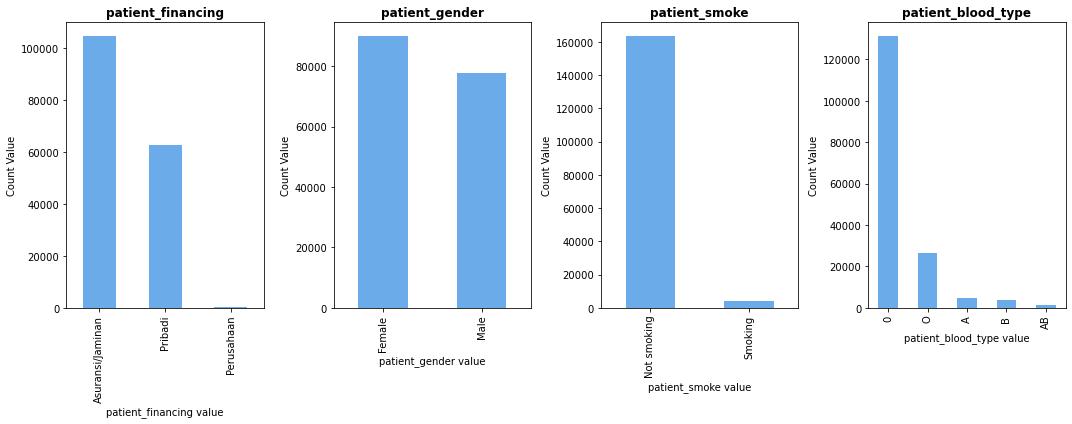

In [29]:
#Check distribution variable with few categories
catcolumn = ['patient_financing','patient_gender','patient_smoke', 'patient_blood_type']
fig = plt.figure(figsize=(15,6))
ax_value = []
for x in range(len(catcolumn)): 
    ax_value.append(f'ax{x}')
                    
for i in range(len(catcolumn)):
    ax_value[i] = fig.add_subplot(1, len(catcolumn), i + 1)
    data[catcolumn[i]].value_counts().plot(kind='bar', color='#6cabea', ax=ax_value[i])
    ax_value[i].set_title(f'{catcolumn[i]}', fontweight='bold')
    ax_value[i].set_xlabel(f'{catcolumn[i]} value')
    ax_value[i].set_ylabel('Count Value')
    plt.tight_layout()

In [30]:
#Check distribution variable with a lot of categories 
for i in ['clinic_province', 'patient_insurance']: 
    print('\033[1m' + f'{i} Feature Value Counts' + '\033[0m')
    print(data[i].value_counts(ascending=False))

clinic_province Feature Value Counts
Jawa Barat                   128058
DKI Jakarta                    9346
Banten                         8739
Lampung                        4774
Sumatera Barat                 4258
Jawa Tengah                    3425
Jawa Timur                     2014
Bali                            924
Sumatera Utara                  837
Sulawesi Utara                  785
Jambi                           509
Riau                            433
Aceh                            430
Kalimantan Selatan              369
Sumatera Selatan                319
Bengkulu                        287
DI Yogyakarta                   286
Nusa Tenggara Timur             278
Sulawesi Tengah                 274
Sulawesi Selatan                252
Kalimantan Barat                238
Kalimantan Tengah               228
Kepulauan Riau                  208
Kalimantan Timur                184
Kepulauan Bangka Belitung        86
Kalimantan Utara                 54
Nusa Tenggara Barat        

**Multivariate Analysis**

**1. How many patient registration per month of years**

In [31]:
#change datatype to datetime for registration_created_at
data['registration_created_at'] = pd.to_datetime(data.registration_created_at)

In [32]:
#Create column for month year registration_create_at
data['Date_registration'] = data['registration_created_at'].dt.date
data['month_year_registration'] = data['registration_created_at'].dt.to_period('M')
data['Year_registration'] = data.registration_created_at.dt.isocalendar().year 
data[['Year_registration','month_year_registration']]

,Year_registration,month_year_registration
0,2019,2019-02
1,2019,2019-02
2,2019,2019-02
3,2019,2019-02
4,2019,2019-02
...,...,...
168029,2023,2023-05
168030,2023,2023-05
168031,2023,2023-05
168032,2023,2023-05


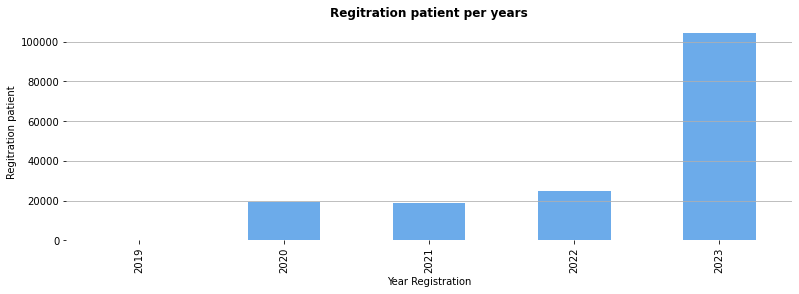

In [33]:
#How registration patient for each month of years
plt.figure(figsize=(13,4))
plt.box(False)
data.groupby('Year_registration')['icd_10'].count().plot(kind='bar', color='#6cabea')
plt.title('Regitration patient per years', fontweight='bold', fontsize=12)
plt.ylabel('Regitration patient', fontsize=10)
plt.grid(axis = 'y')
plt.xlabel('Year Registration')
plt.show()

**Key Takeaway**
- Data registrasi pasien yang berkunjung semakin lama semakin meningkat kecuali ditahun 2021 yang mengalami sedikit penurunan dari tahun sebelumnya
- Pada tahun 2023 kunjungan pasien paling tinggi dibandingkan tahun-tahun sebelumnya

**2. How diagnose patient for each month of years**

In [34]:
#change datatype to datetime for medical_record_created_at
data['medical_record_created_at'] = pd.to_datetime(data.medical_record_created_at)

In [35]:
#Create column for month year medical_record_created_at
data['Date_medical'] = data['medical_record_created_at'].dt.date
data['month_year_medical'] = data['medical_record_created_at'].dt.to_period('M')
data['Year_medical'] = data.medical_record_created_at.dt.isocalendar().year 
data[['Year_medical','month_year_medical']]

,Year_medical,month_year_medical
0,2019,2019-02
1,2019,2019-02
2,2019,2019-02
3,2019,2019-02
4,2019,2019-02
...,...,...
168029,2023,2023-05
168030,2023,2023-05
168031,2023,2023-05
168032,2023,2023-05


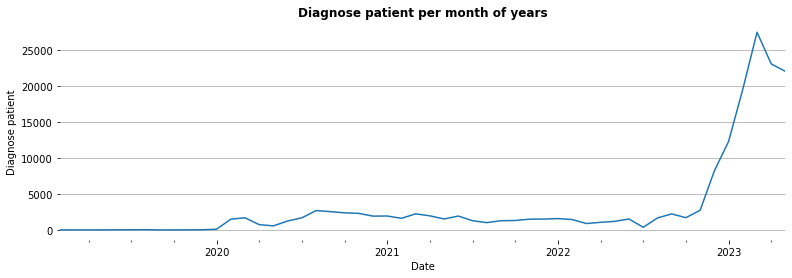

In [36]:
#How diagnose patient for each month of years
plt.figure(figsize=(13,4))
plt.box(False)
data.groupby('month_year_medical')['icd_10'].count().plot(kind='line')
plt.title('Diagnose patient per month of years', fontweight='bold', fontsize=12)
plt.ylabel('Diagnose patient', fontsize=10)
plt.grid(axis = 'y')
plt.xlabel('Date')
plt.show()

**Key Takeaway**
- Tahun 2023 memiliki jumlah diagnosis penyakit pasien tertinggi dibandingkan tahun-tahun sebelumnya

**3. How old patient with the most diagnose**

In [37]:
#create column for patient_birth_date with datetime type and mark if there is error patient_birth_date 
data['birthdate'] = pd.to_datetime(data['patient_birth_date'], errors = 'coerce')

In [38]:
#get only date format from birthdate
data['birthdate'] = data['birthdate'].dt.date

In [39]:
#check data with error patient_birth_date 
data[data['birthdate'].isna()]

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,...,icd_10,group_regency,group_disease,Date_registration,month_year_registration,Year_registration,Date_medical,month_year_medical,Year_medical,birthdate
72,2019-08-25 16:56:16,Pribadi,0,Banten,Kota Tangerang Selatan,3dab52a0-c71e-11e9-84de-0f50e20b7e9d,0196-10-12,Female,Not smoking,0,...,Efek samping dalam penggunaan terapi agen yang...,Tangerang,Other diseases,2019-08-25,2019-08,2019,2019-08-25,2019-08,2019,NaT
1168,2020-02-14 14:33:47,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,078284a0-4efc-11ea-975d-ebe3bbfb4791,0994-09-04,Female,Not smoking,0,...,Demam tifoid,0,Other diseases,2020-02-14,2020-02,2020,2020-02-14,2020-02,2020,NaT
1256,2020-02-17 10:15:55,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,723bbff0-5133-11ea-9912-9909650c46dc,1061-09-12,Female,Not smoking,0,...,batuk,0,Other diseases,2020-02-17,2020-02,2020,2020-02-17,2020-02,2020,NaT
2923,2020-03-16 10:49:11,Pribadi,0,Jawa Barat,Kota Bekasi,8786dd50-635c-11ea-bbcd-599286143b8d,0973-03-18,Female,Not smoking,B,...,Fisura anus kronis,Bekasi,Other diseases,2020-03-16,2020-03,2020,2020-03-16,2020-03,2020,NaT
2944,2020-03-16 04:58:04,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,723bbff0-5133-11ea-9912-9909650c46dc,1061-09-12,Female,Not smoking,0,...,"Infeksi influenzae Haemophilus , tidak spesifik",0,Flu,2020-03-16,2020-03,2020,2020-03-16,2020-03,2020,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53723,2022-11-15 17:53:17,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,078284a0-4efc-11ea-975d-ebe3bbfb4791,0994-09-04,Female,Not smoking,0,...,Dermatitis atopik lainnya,0,Other diseases,2022-11-15,2022-11,2022,2022-11-15,2022-11,2022,NaT
67197,2023-01-13 09:28:01,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,078284a0-4efc-11ea-975d-ebe3bbfb4791,0994-09-04,Female,Not smoking,0,...,Pencernaan yg terganggu,0,Pencernaan,2023-01-13,2023-01,2023,2023-01-13,2023-01,2023,NaT
73153,2023-01-27 10:05:45,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,723bbff0-5133-11ea-9912-9909650c46dc,1061-09-12,Female,Not smoking,0,...,"Neuralgia and neuritis, unspecified, lower leg",0,Other diseases,2023-01-27,2023-01,2023,2023-01-27,2023-01,2023,NaT
86544,2023-02-16 19:33:31,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,723bbff0-5133-11ea-9912-9909650c46dc,1061-09-12,Female,Not smoking,0,...,sakit kepala,0,Other diseases,2023-02-16,2023-02,2023,2023-02-16,2023-02,2023,NaT


In [40]:
#create column for age patient

from datetime import date
 
def age(birthdate):
    today = date.today()
    age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

data['Age'] = data['birthdate'].apply(age)

In [41]:
#fill error format age patient to nan in column age
data['Age'].fillna('')

0         26.0
1         33.0
2         26.0
3         26.0
4         30.0
          ... 
168029    36.0
168030    13.0
168031    47.0
168032     4.0
168033     4.0
Name: Age, Length: 167622, dtype: object

In [42]:
#change age type to integer
data['Age'] = data['Age'].astype("Int64")

In [43]:
#fill nan value of age patient to 0
data['Age']= data['Age'].fillna(0)

In [44]:
#get Q1, Q2, Q3 from age patient
data['Age'].quantile([.25, .5, .75])

0.25    19
0.50    34
0.75    51
Name: Age, dtype: Int64

In [45]:
#create age group of patient
def age_patient(a):
    if a <= 20:
        age = "age <= 20"
    elif a <= 34 :
        age = "age 21 - 34"
    elif a  <= 51 :
        age = "age 35 - 51"
    else :
        age = "age > 51"
        
    return age

data["age_group"] = data['Age'].apply(age_patient)
data.sample(4)

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,...,group_disease,Date_registration,month_year_registration,Year_registration,Date_medical,month_year_medical,Year_medical,birthdate,Age,age_group
97764,2023-03-03 19:47:20,Pribadi,0,Sumatera Barat,Kab. Lima Puluh Koto/kota,78063870-b9c1-11ed-8c96-cb837f24eb92,1995-08-01,Male,Smoking,0,...,Other diseases,2023-03-03,2023-03,2023,2023-03-03,2023-03,2023,1995-08-01,27,age 21 - 34
65244,2023-01-06 19:49:20,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,Kota Bekasi,217cb930-8dc0-11ed-a21d-d162a5cf7452,1956-05-05,Male,Not smoking,O,...,Other diseases,2023-01-06,2023-01,2023,2023-01-06,2023-01,2023,1956-05-05,67,age > 51
40113,2022-01-26 02:17:40,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,e195c350-3d85-11ea-aad1-7d6075812eaf,1964-04-07,Male,Not smoking,O,...,Other diseases,2022-01-26,2022-01,2022,2022-01-26,2022-01,2022,1964-04-07,59,age > 51
86350,2023-02-16 15:52:44,Pribadi,0,Sulawesi Selatan,Palopo (Kota),3edf8680-add7-11ed-a513-3d0f1a598435,2012-07-03,Male,Not smoking,0,...,Other diseases,2023-02-16,2023-02,2023,2023-02-16,2023-02,2023,2012-07-03,10,age <= 20


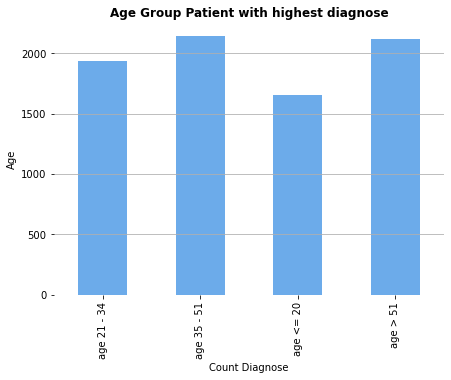

In [46]:
# Get the top 10 clinic regency with highest diagnose
plt.figure(figsize=(7,5))
plt.box(False)
data.groupby(['age_group'])['icd_10'].nunique().plot(kind='bar', color='#6cabea')

plt.title('Age Group Patient with highest diagnose', fontweight='bold')
plt.ylabel('Age')
plt.xlabel('Count Diagnose')
plt.grid(axis = 'y')
plt.show()

**Key Takeaway**
- Terdapat 78 data pasien yang tanggal lahirnya tidak sesuai format
- Diagnose pasien paling banyak dialami oleh pasien dengan umur lebih dari 35 tahun

**Business problem**

**1. Bagaimana persebaran penyakit di lokasi dan waktu?**

Kita akan lihat bagaimana persebaran penyakit untuk dalam lingkup provinsi dan kota di tiap tahun dan juga tiap musim

a. Persebaran penyakit tiap tahun

In [47]:
#How diagnose patient in every years for each clinic province and clinic regency
diagnose_loc_year = data.groupby(['clinic_province','group_regency','Year_medical','month_year_medical'])['icd_10'].nunique().reset_index().sort_values(by='icd_10',ascending=False)
diagnose_loc_year

,clinic_province,group_regency,Year_medical,month_year_medical,icd_10
283,Jawa Barat,Bekasi,2023,2023-03,1001
282,Jawa Barat,Bekasi,2023,2023-02,969
284,Jawa Barat,Bekasi,2023,2023-04,881
285,Jawa Barat,Bekasi,2023,2023-05,838
281,Jawa Barat,Bekasi,2023,2023-01,760
...,...,...,...,...,...
435,Jawa Timur,Kab. Jember,2023,2023-01,1
592,Sulawesi Selatan,Kota Palopo,2023,2023-02,1
75,DI Yogyakarta,Bantul,2023,2023-02,1
434,Jawa Timur,Kab. Gresik,2023,2023-05,1


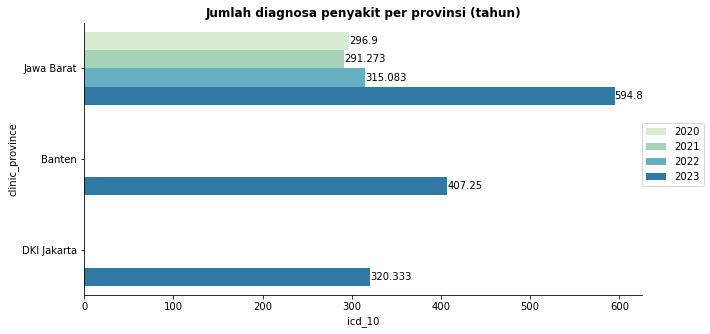

In [48]:
fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(
    data=diagnose_loc_year.head(50), 
    x='icd_10', 
    y='clinic_province', 
    hue='Year_medical', 
    palette="GnBu",
    ci=False,
    ax=ax1)
plt.title("Jumlah diagnosa penyakit per provinsi (tahun)", fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i,)

plt.legend(bbox_to_anchor=(1, 0.4), loc='lower left', borderaxespad=0)
sns.despine(fig)

**Insight**
- Pada tahun 2020-2023 provinsi jawa barat merupakan lokasi klinik dengan diagnosa penyakit terbanyak
- Tiga provinsi dengan diagnosa penyakit terbanyak adalah jawa barat, banten, dan dki jakarta


Dari provinsi jawa barat kita akan lihat kota mana saja yang memiliki persebaran penyakit terbanyak

In [49]:
diagnose_loc_regency= data[(data['clinic_province'] == 'Jawa Barat')&(data['group_regency'] != '0')].groupby(['group_regency', 'icd_10','Year_medical']).agg(
    total_penyakit=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_penyakit',ascending=False)

diagnose_loc_regency

,group_regency,icd_10,Year_medical,total_penyakit
1262,Bekasi,"ISPA bagian atas , tidak spesifik",2023,8647
2150,Bekasi,Pencernaan yg terganggu,2023,4576
893,Bekasi,Esensial ( primer) hipertensi,2023,2824
341,Bekasi,Acute pharyngitis,2023,2128
1774,Bekasi,Nasopharyngitis akut [ flu biasa ],2023,1686
...,...,...,...,...
1817,Bekasi,Neoplasma jinak kolom vertebral,2023,1
1818,Bekasi,Neoplasma jinak kolon sigmoid,2022,1
1822,Bekasi,Neoplasma jinak lainnya jaringan lunak ikat da...,2023,1
1823,Bekasi,Neoplasma jinak lainnya jaringan lunak ikat da...,2023,1


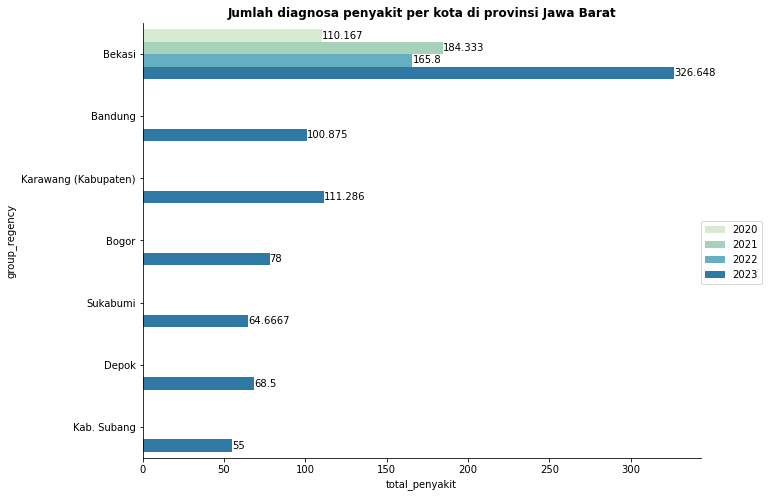

In [50]:
fig, ax1 = plt.subplots(figsize=(10,8))
sns.barplot(
    data=diagnose_loc_regency.head(200), 
    x='total_penyakit', 
    y='group_regency', 
    hue='Year_medical', 
    palette="GnBu",
    ci=False,
    ax=ax1)
plt.title("Jumlah diagnosa penyakit per kota di provinsi Jawa Barat", fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i,)

plt.legend(bbox_to_anchor=(1, 0.4), loc='lower left', borderaxespad=0)
sns.despine(fig)

**Insight**
- Bekasi merupakan kota di provinsi jawa barat yang memiliki jumlah diagnosa penyakit terbanyak tahun 2020-2023
- Tiga kota dijawa barat dengan jumlah diagnosa terbanyak adalah bekasi (2020-2023), bandung (2023), dan karawang (2023)

Dari kota bekasi kita akan lihat penyakit apa saja yang banyak diderita olah pasien

In [51]:
regency_disease_year= data[(data['group_regency'] == 'Bekasi')].groupby(['group_regency', 'icd_10','Year_medical']).agg(
    total_diagnosa=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnosa',ascending=False)
regency_disease_year

,group_regency,icd_10,Year_medical,total_diagnosa
987,Bekasi,"ISPA bagian atas , tidak spesifik",2023,8647
1875,Bekasi,Pencernaan yg terganggu,2023,4576
618,Bekasi,Esensial ( primer) hipertensi,2023,2824
66,Bekasi,Acute pharyngitis,2023,2128
1499,Bekasi,Nasopharyngitis akut [ flu biasa ],2023,1686
...,...,...,...,...
846,Bekasi,Gegar otak dan edema sumsum tulang belakang to...,2023,1
847,Bekasi,Gejala dan tanda-tanda tentang makanan dan asu...,2022,1
1783,Bekasi,"Other sudden death, cause unknown",2023,1
1782,Bekasi,Other streptococcal arthritis and polyarthriti...,2023,1


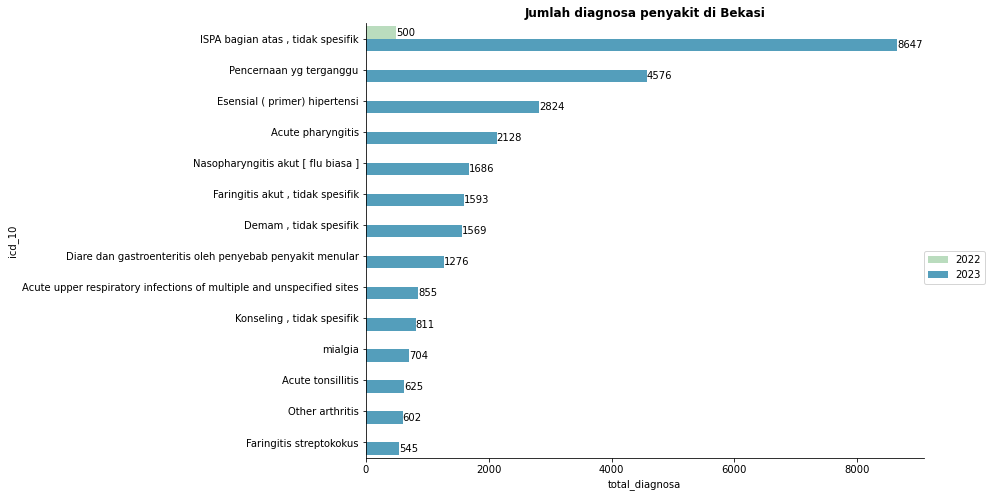

In [52]:
fig, ax1 = plt.subplots(figsize=(10,8))
sns.barplot(
    data=regency_disease_year.head(15), 
    x='total_diagnosa', 
    y='icd_10', 
    hue='Year_medical',
    palette="GnBu", 
    ci=False,
    ax=ax1)
plt.title("Jumlah diagnosa penyakit di Bekasi", fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i,)

plt.legend(bbox_to_anchor=(1, 0.4), loc='lower left', borderaxespad=0)
sns.despine(fig)


**Insight**
- ISPA bagian atas merupakan penyakit yang paling banyak diderita oleh pasien di bekasi ditahun 2022 sebanyak 500 kasus dan 2023 sebanyak 8647 kasus
- 5 penyakit yang paling dialami oleh pasien dibekasi tahun 2023 adalah ISPA bagian atas, Pencernaan yang terganggu, Esensial(primer) hipertensi, Acute pharyngitis, Nasopharyngitis akut [flu biasa]

b. Persebaran penyakit tiap musim

In [53]:
#create season group from date register
def season(month):
    bulan = str(month)
    bln = bulan[5:]
   
    if bln in ['01', '02', '11', '12']:
        musim = "Penghujan"
    elif bln in ['05','06', '07', '08']:
        musim = "Kemarau"
    else :
        musim = "Pancaroba" #bulan 03, 04, 09 dan 10
        
    return musim

data["season"] = data['month_year_registration'].apply(season)
data.sample(3)

,registration_created_at,patient_financing,patient_insurance,clinic_province,clinic_regency,patient_id,patient_birth_date,patient_gender,patient_smoke,patient_blood_type,...,Date_registration,month_year_registration,Year_registration,Date_medical,month_year_medical,Year_medical,birthdate,Age,age_group,season
124617,2023-04-03 14:11:26,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,Kota Bekasi,07771450-a928-11ed-bb73-bd76bff97ace,1994-02-20,Male,Smoking,0,...,2023-04-03,2023-04,2023,2023-04-03,2023-04,2023,1994-02-20,29,age 21 - 34,Pancaroba
156791,2023-05-10 19:00:18,Pribadi,0,Bali,KAB. TABANAN,9922281b-debb-4663-af0f-8fb6b96587c5,1992-02-09,Female,Not smoking,0,...,2023-05-10,2023-05,2023,2023-05-10,2023-05,2023,1992-02-09,31,age 21 - 34,Kemarau
63352,2022-12-31 10:24:15,Asuransi/Jaminan,BPJS Kesehatan,Jawa Barat,0,87341420-88ba-11ed-806d-d17aa54a7ac1,2019-08-29,Female,Not smoking,0,...,2022-12-31,2022-12,2022,2022-12-31,2022-12,2022,2019-08-29,3,age <= 20,Penghujan


In [54]:
#How diagnose patient in every years for each clinic province and clinic regency
diagnose_season = data[(data['group_regency']!='0')].groupby(['clinic_province','group_regency','season', 'icd_10']).agg(
    total_penyakit=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_penyakit',ascending=False)
diagnose_season

,clinic_province,group_regency,season,icd_10,total_penyakit
6232,Jawa Barat,Bekasi,Pancaroba,"ISPA bagian atas , tidak spesifik",4620
7593,Jawa Barat,Bekasi,Penghujan,"ISPA bagian atas , tidak spesifik",3303
6681,Jawa Barat,Bekasi,Pancaroba,Pencernaan yg terganggu,2151
8056,Jawa Barat,Bekasi,Penghujan,Pencernaan yg terganggu,2053
7405,Jawa Barat,Bekasi,Penghujan,Esensial ( primer) hipertensi,1448
...,...,...,...,...,...
6461,Jawa Barat,Bekasi,Pancaroba,Mononeuropati lain dari ekstremitas atas,1
6462,Jawa Barat,Bekasi,Pancaroba,Mononeuropati tertentu lainnya,1
6466,Jawa Barat,Bekasi,Pancaroba,"Muscle strain, ankle and foot",1
6468,Jawa Barat,Bekasi,Pancaroba,"Myalgia, forearm",1


In [55]:
#Precentage diagnose by season
diag_season_persen = data.groupby("season").agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index()

diag_season_persen['season_persentage'] = round(100 * diag_season_persen['total_diagnose'] / diag_season_persen.total_diagnose.sum(),1)
diag_season_persen

,season,total_diagnose,season_persentage
0,Kemarau,38787,23.1
1,Pancaroba,70595,42.1
2,Penghujan,58240,34.7


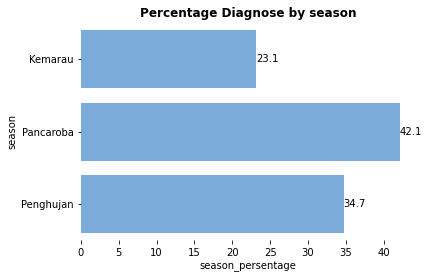

In [56]:
plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Percentage Diagnose by season', fontweight='bold')
ax = sns.barplot(
    data=diag_season_persen, 
    x="season_persentage",
    y="season", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insight**
- jika dilihat dari jumlah penyakit permusim yang dialami pasien, penyakit paling banyak terjadi dimusim kemarau
- masing-masing persentage tiap musim : Kemarau 42.3%, Penghujan 32.3% dan pancaroba 25,4%

Kita akan lihat bagaimana persebaran penyakit dikota pada tiap musim

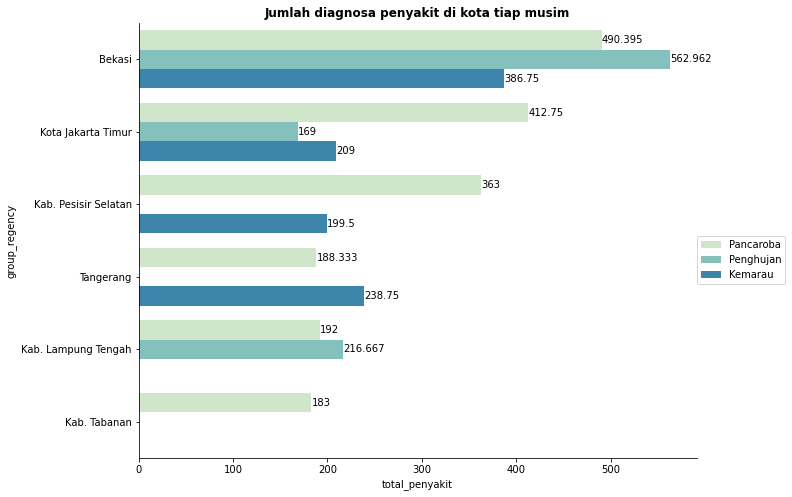

In [57]:
fig, ax1 = plt.subplots(figsize=(10,8))
sns.barplot(
    data=diagnose_season.head(100), 
    x='total_penyakit', 
    y='group_regency', 
    hue='season', 
    palette="GnBu",
    ci=False,
    ax=ax1)
plt.title("Jumlah diagnosa penyakit di kota tiap musim", fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i,)

plt.legend(bbox_to_anchor=(1, 0.4), loc='lower left', borderaxespad=0)
sns.despine(fig)

**Insight**
- Bekasi memiliki jumlah diagnosa penyakit pasien terbanyak disetiap musim
- 5 kota dengan jumlah diagnosa penyakit terbanyak berdasarkan musim adalah bekasi, jakarta timur, kab. pesisir selatan, tangerang, kab. lampung tengah

Dari kota bekasi kita akan lihat penyakit apa saja yang banyak dialami oleh pasien disetiap musim

In [58]:
diag_regency_season= data[(data['group_regency'] == 'Bekasi')].groupby(['group_regency', 'icd_10','season']).agg(
    total_diagnosa=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnosa',ascending=False)
diag_regency_season

,group_regency,icd_10,season,total_diagnosa
1352,Bekasi,"ISPA bagian atas , tidak spesifik",Pancaroba,4620
1353,Bekasi,"ISPA bagian atas , tidak spesifik",Penghujan,3303
2543,Bekasi,Pencernaan yg terganggu,Pancaroba,2151
2544,Bekasi,Pencernaan yg terganggu,Penghujan,2053
861,Bekasi,Esensial ( primer) hipertensi,Penghujan,1448
...,...,...,...,...
1651,Bekasi,Kyphosis lain dan tidak spesifik,Pancaroba,1
1648,Bekasi,"Kusta , tidak spesifik",Pancaroba,1
1647,Bekasi,Kurangnya pembangunan lainnya fisiologis norma...,Penghujan,1
1646,Bekasi,Kurangnya pembangunan lainnya fisiologis norma...,Kemarau,1


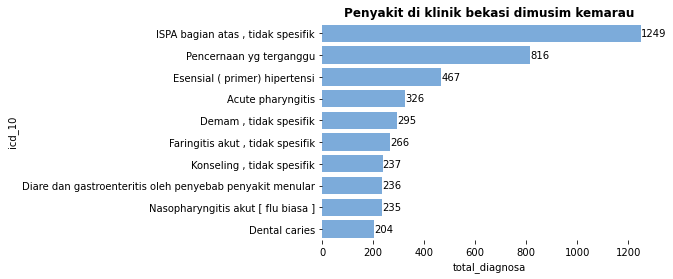

In [59]:
kemarau = diag_regency_season[(diag_regency_season['season'] == 'Kemarau')]

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Penyakit di klinik bekasi dimusim kemarau', fontweight='bold')
ax = sns.barplot(
    data=kemarau.head(10), 
    x="total_diagnosa",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insigth**
- 10 penyakit yang paling banyak dialami pasien di klinik bekasi dimusim kemarau adalah : 
    - ISPA bagian atas , tidak spesifik
    - Pencernaan yg terganggu
    - Esensial ( primer) hipertensi
    - Acute pharyngitis
    - Demam , tidak spesifik
    - Faringitis akut , tidak spesifik
    - Nasopharyngitis akut [ flu biasa ]
    - Acute upper respiratory infections of multiple
    - Diare dan gastroenteritis
    - Konseling , tidak spesifik

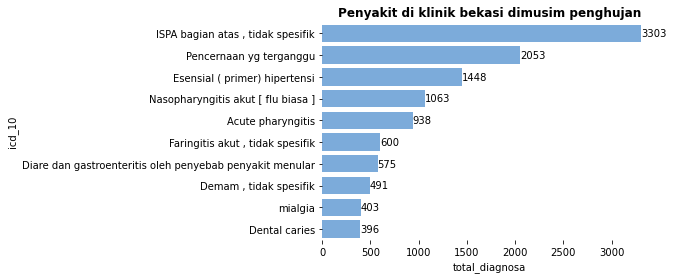

In [60]:
penghujan = diag_regency_season[(diag_regency_season['season'] == 'Penghujan')]
plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Penyakit di klinik bekasi dimusim penghujan', fontweight='bold')
ax = sns.barplot(
    data=penghujan.head(10), 
    x="total_diagnosa",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insigth**
- 10 penyakit yang paling banyak dialami pasien di klinik bekasi dimusim penghujan adalah : 
    - ISPA bagian atas , tidak spesifik
    - Pencernaan yg terganggu
    - Esensial ( primer) hipertensi
    - Nasopharyngitis akut [ flu biasa ]
    - Acute pharyngitis
    - Faringitis akut , tidak spesifik
    - Diare dan gastroenteritis
    - Demam , tidak spesifik
    - Mialgia
    - Dental caries
    

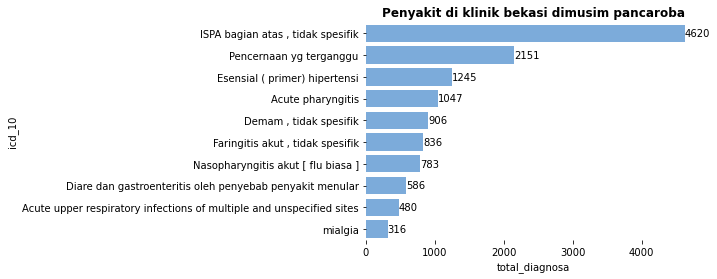

In [61]:
pancaroba = diag_regency_season[(diag_regency_season['season'] == 'Pancaroba')]


plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Penyakit di klinik bekasi dimusim pancaroba', fontweight='bold')
ax = sns.barplot(
    data=pancaroba.head(10), 
    x="total_diagnosa",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insigth**
- 10 penyakit yang paling banyak dialami pasien di klinik bekasi dimusim pancaroba adalah : 
    - ISPA bagian atas , tidak spesifik
    - Pencernaan yg terganggu
    - Esensial ( primer) hipertensi
    - Acute pharyngitis
    - Demam , tidak spesifik
    - Nasopharyngitis akut [ flu biasa ]
    - Faringitis akut , tidak spesifik
    - Diare dan gastroenteritis
    - Mialgia
    - Mual dan muntah
    

Kita akan lihat 10 provinsi dengan jumlah diagnosa terbanyak

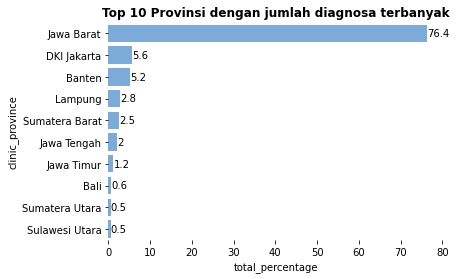

In [62]:
province = data.groupby(["clinic_province"]).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
    ).reset_index().sort_values(by=["total_diagnose"],ascending=False)

province['total_percentage'] = round(100 * province['total_diagnose'] / province.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Provinsi dengan jumlah diagnosa terbanyak', fontweight='bold')
ax = sns.barplot(
    data=province.head(10), 
    x="total_percentage",
    y="clinic_province", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insight**
- 5 dari 10 Provinsi dengan diagnosa terbanyak ada di jawa barat,banten, DKI Jakarta, Lampung, dan jawa tengah
- Provinsi jawa barat mendominasi dalam jumlah penyakit pasien jika dibandingkan dengan provinsi lain sebanyak 3103 kasus

Selain itu kita juga akan lihat 10 kota dengan jumlah diagnosa terbanyak

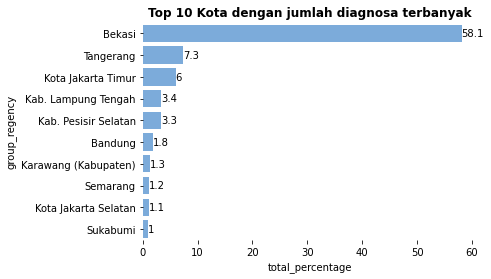

In [63]:
kota = data[(data['group_regency']!='0')].groupby(["group_regency"]).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
    ).reset_index().sort_values(by=["total_diagnose"],ascending=False)

kota['total_percentage'] = round(100 * kota['total_diagnose'] / kota.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Kota dengan jumlah diagnosa terbanyak', fontweight='bold')
ax = sns.barplot(
    data=kota.head(10), 
    x="total_percentage",
    y="group_regency", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insight**
- 5 dari 10 kota dengan jumlah diagnosa terbanyak adalah bekasi, tangerang, jakarta timur, kab. lampung tengah, dan semarang

**2. Bagaimana penggunaan jenis pembayaran dan korelasinya dengan penyakit yang ditangani?**

Pertama kita akan lihat bagaimana persentase penggunaa jenis pembayaran yang digunakan pasien

In [64]:
#Precentage of payment type that be use by patient
financing = data.groupby("patient_financing").agg(
    total_payment=pd.NamedAgg(column="registration_created_at", aggfunc="count")
).reset_index()

financing['payment_percentage'] = round(100 * financing['total_payment'] / financing.total_payment.sum(),1)

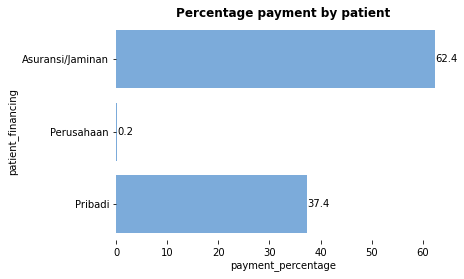

In [65]:
plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Percentage payment by patient', fontweight='bold')
ax = sns.barplot(
    data=financing, 
    x="payment_percentage",
    y="patient_financing", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

**Insight**
- Sebanyak 62,4% pasien menggunakan asuransi/jaminan
- 37,4 % pembayaran dilakukan secara pribadi
- 0,2% pembayaran dilakukan oleh perusahaan

Sekarang kita akan coba lihat persentase penggunaan asuransi bpjs dan non bpjs dijenis pembayaran asuransi/jaminan

In [66]:

def pembayaran(x):
    fin = x[0]
    ins = x[1]
    if fin == 'Asuransi/Jaminan' :
        if ins == 'BPJS Kesehatan':
            bayar = 'BPJS'
        else :
            bayar ='Non BPJS'
        
    else 
        bayar = fin

    return bayar

data["pembayaran"] = data[['patient_financing','patient_insurance']].apply(pembayaran,axis=1)

In [67]:
data['pembayaran'].unique()

array(['Pribadi', 'Non BPJS', 'BPJS', 'Perusahaan'], dtype=object)

In [68]:
detail_bayar = data.groupby('pembayaran').agg(
    total_payment=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index()

detail_bayar['payment_percentage'] = round(100 * detail_bayar['total_payment'] / detail_bayar.total_payment.sum(),1)
detail_bayar

,pembayaran,total_payment,payment_percentage
0,BPJS,102317,61.0
1,Non BPJS,2240,1.3
2,Perusahaan,384,0.2
3,Pribadi,62681,37.4


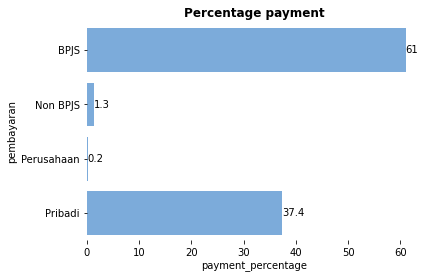

In [69]:
plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Percentage payment', fontweight='bold')
ax = sns.barplot(
    data=detail_bayar, 
    x="payment_percentage",
    y="pembayaran", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

Kita akan lihat penyakit pasien dan dibayarkan dengan jenis pembayaran tersebut

In [70]:
#get amount for each diagnose 
pay_diagnose = data.groupby(["icd_10","pembayaran"]).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
    ).reset_index().sort_values(by=["total_diagnose","icd_10","pembayaran"],ascending=False)
pay_diagnose.head(10)

,icd_10,pembayaran,total_diagnose
1902,General examination and investigation of perso...,Pribadi,8777
2183,"ISPA bagian atas , tidak spesifik",BPJS,8438
4226,Pencernaan yg terganggu,BPJS,7743
3334,Nasopharyngitis akut [ flu biasa ],BPJS,7624
1357,Esensial ( primer) hipertensi,BPJS,5041
4186,Pemeriksaan kesehatan umum,Pribadi,4951
4229,Pencernaan yg terganggu,Pribadi,3729
2186,"ISPA bagian atas , tidak spesifik",Pribadi,3112
3797,Other diseases of upper respiratory tract,BPJS,2976
3337,Nasopharyngitis akut [ flu biasa ],Pribadi,2714


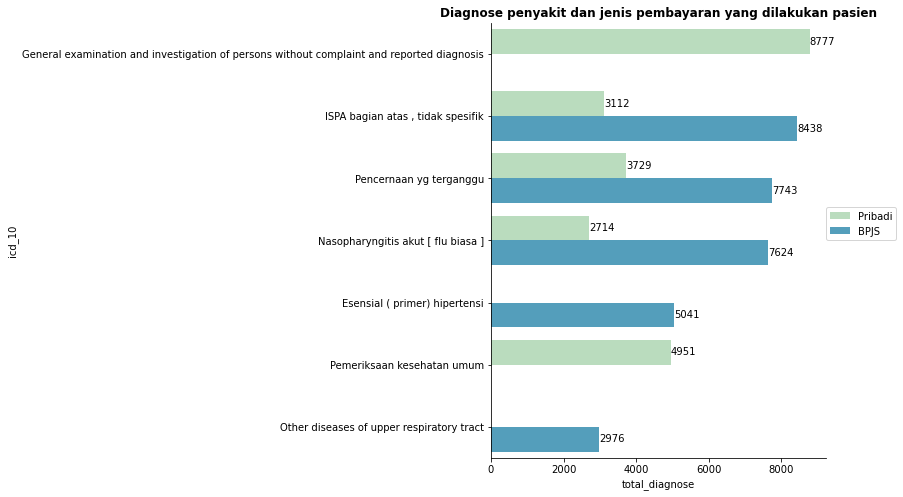

In [71]:
fig, ax1 = plt.subplots(figsize=(6,8))
sns.barplot(
    data=pay_diagnose.head(10), 
    x='total_diagnose', 
    y='icd_10', 
    hue='pembayaran', 
    palette="GnBu",
    ax=ax1)
plt.title("Diagnose penyakit dan jenis pembayaran yang dilakukan pasien", fontweight='bold')
for i in ax1.containers:
    ax1.bar_label(i,)

plt.legend(bbox_to_anchor=(1, 0.5), loc='lower left', borderaxespad=0)
sns.despine(fig)

In [72]:
#Check correlation between disease and patient financing
data_icd=data['icd_10'].astype('category').cat.codes
data_patient_financing=data['patient_financing'].astype('category').cat.codes
data_icd.corr(data_patient_financing)

-0.025459501731707187

**Insight**<br>
- a. Dari 7 penyakit dengan jumlah tertinggi diatas dapat dilihat bahwa:
    - beberapa penyakit yang dibayarkan dengan pembayaran pribadi saja, diantaranya :
  General examination sebanyak 8777 kasus dan pemeriksaan kesehatan umum sebanyak 4951 kasus
    - beberapa penyakit yang dibayarkan menggunakan pembayaran pribadi dan asuransi, diantaranya : ISPA bagian atas, pencernaan yang terganggu, dan nasopharyngitid akut[flu biasa]
    - beberapa penyakit yang dibayarkan dengan pembayaran asuransi saja, diantaranya : esensial(primer) hipertensi, dan other diseases of upper respiratory tract
- b. tidak ada korelasi yang signifikan (korelasi yang lemah) antara jenis pembayaran dan jenis penyakit pasien 

Untuk mengetahui lebih jelasnya penyakit apa saja untuk tiap jenis pembayaran, kita akan lihat 10 penyakit terbanyak untuk masing-masing jenis pembayaran

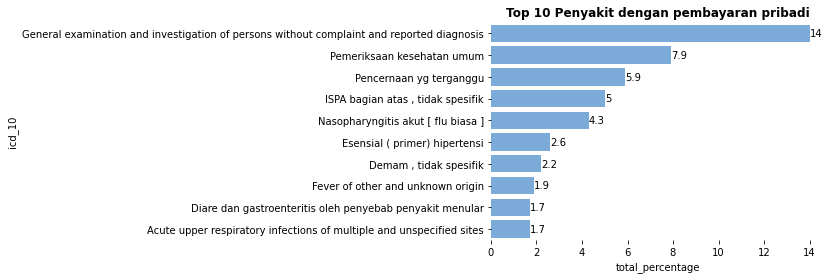

In [73]:
pribadi= data[(data['patient_financing'] == 'Pribadi')].groupby(['icd_10']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
pribadi['total_percentage'] = round(100 * pribadi['total_diagnose'] / pribadi.total_diagnose.sum(),1)


plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Penyakit dengan pembayaran pribadi', fontweight='bold')
ax = sns.barplot(
    data=pribadi.head(10), 
    x="total_percentage",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

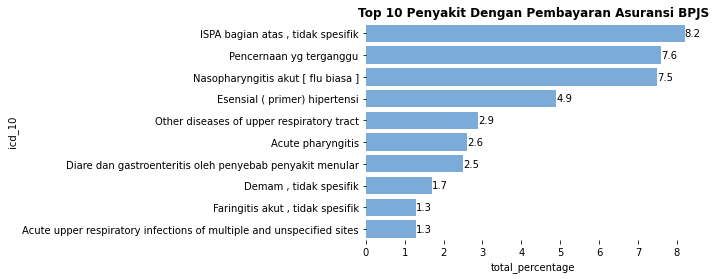

In [74]:
asuransi_bpjs= data[(data['pembayaran'] == 'BPJS')].groupby(['icd_10']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
asuransi_bpjs['total_percentage'] = round(100 * asuransi_bpjs['total_diagnose'] / asuransi_bpjs.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Penyakit Dengan Pembayaran Asuransi BPJS', fontweight='bold')
ax = sns.barplot(
    data=asuransi_bpjs.head(10), 
    x="total_percentage",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

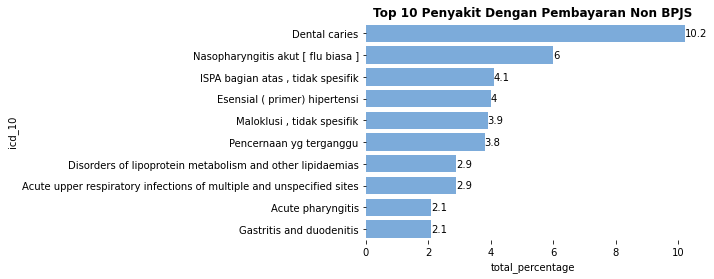

In [75]:
asuransi_nonbpjs= data[(data['pembayaran'] == 'Non BPJS')].groupby(['icd_10']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
asuransi_nonbpjs['total_percentage']=round(100 * asuransi_nonbpjs['total_diagnose']/asuransi_nonbpjs.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Penyakit Dengan Pembayaran Non BPJS', fontweight='bold')
ax = sns.barplot(
    data=asuransi_nonbpjs.head(10), 
    x="total_percentage",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

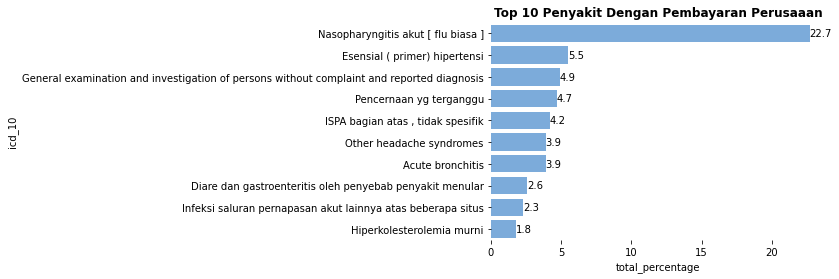

In [76]:
perusahaan= data[(data['patient_financing'] == 'Perusahaan')].groupby(['icd_10']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
perusahaan['total_percentage'] = round(100 * perusahaan['total_diagnose'] / perusahaan.total_diagnose.sum(),1)


plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Penyakit Dengan Pembayaran Perusaaan', fontweight='bold')
ax = sns.barplot(
    data=perusahaan.head(10), 
    x="total_percentage",
    y="icd_10", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

Karena pembayaran menggunakan asuransi paling banyak dipakai, kita akan lihat 10 asuransi yang paling banyak digunakan oleh pasien

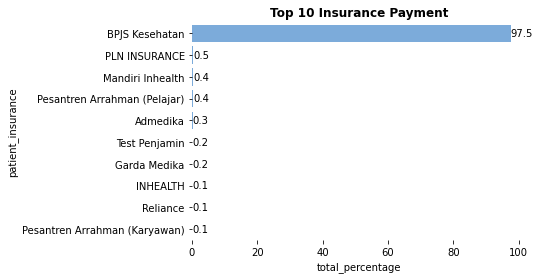

In [77]:
top_insurance= data[(data['patient_insurance'] != 0)].groupby(['patient_insurance']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
top_insurance['total_percentage'] = round(100 * top_insurance['total_diagnose'] / top_insurance.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Insurance Payment', fontweight='bold')
ax = sns.barplot(
    data=top_insurance.head(10), 
    x="total_percentage",
    y="patient_insurance", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

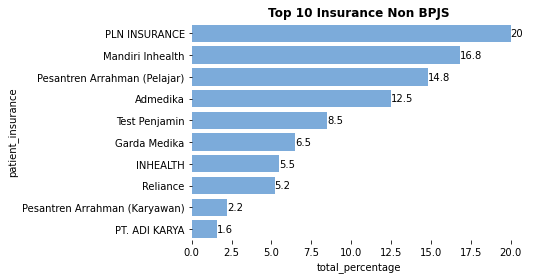

In [78]:
top_ins_nonbpjs= data[(data['patient_insurance'] != 0)&(data['patient_insurance'] != 'BPJS Kesehatan')].groupby(['patient_insurance']).agg(
    total_diagnose=pd.NamedAgg(column="icd_10", aggfunc="count")
).reset_index().sort_values(by='total_diagnose',ascending=False)
top_ins_nonbpjs['total_percentage'] =round(100 * top_ins_nonbpjs['total_diagnose'] / top_ins_nonbpjs.total_diagnose.sum(),1)

plt.figure(figsize=(6,4))
plt.box(False)
plt.title('Top 10 Insurance Non BPJS', fontweight='bold')
ax = sns.barplot(
    data=top_ins_nonbpjs.head(10), 
    x="total_percentage",
    y="patient_insurance", 
    color="#6cabea", 
    orient="h"
)

for i in ax.containers:
    ax.bar_label(i)

In [79]:
#Check correlation between disease and patient_insurance
data_patient_insurance = data['patient_insurance'].astype('category').cat.codes
data_icd.corr(data_patient_insurance)

0.0224674924717997

**Insigth**
- Pembayaran menggunkan asuransi BPJS Kesehatan paling dominan digunakan olaeh pasien sebanyak 2985
- 3 asuransi yang paling sering dipake pasien adalah BPJS Kesehatan, Mandiri Inhealth, dan Pesantren Arrahman(Pelajar)
- Tidak ada korelasi yang signifikan (korelasi yang lemah) antara nama asuransi dan jenis penyakit pasien 

In [80]:
#save csv
data.to_csv("data baru penyakit pasien.csv",index=False)

**Note dataset:**
- datatype untuk kolom registration_created_at, patient_birth_date, medical_record_created_at masih dalam bentuk object bukan datetime
- terdapat banyak data kosong untuk clinic_province, clinic_regency, patient_financing
- terdapat banyak data duplicate dengan jenis pembayaran yang berbeda tetapi dilakukan pada waktu dan data pasien yang sama 
- pada patient_birth_date terdapat penulisan yang tidak sesuai format
- data nama patient_insurance, clinic_province, clinic_regency terdapat data yang duplicate dengan nama yang sama dan penulisan yang berbeda 




**K-Mean**

In [81]:
cluster = data.copy()

In [82]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167622 entries, 0 to 168033
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   registration_created_at    167622 non-null  datetime64[ns]
 1   patient_financing          167622 non-null  object        
 2   patient_insurance          167622 non-null  object        
 3   clinic_province            167622 non-null  object        
 4   clinic_regency             167622 non-null  object        
 5   patient_id                 167622 non-null  object        
 6   patient_birth_date         167622 non-null  object        
 7   patient_gender             167622 non-null  object        
 8   patient_smoke              167622 non-null  object        
 9   patient_blood_type         167622 non-null  object        
 10  medical_record_created_at  167622 non-null  datetime64[ns]
 11  icd_10                     167622 non-null  object  

In [83]:
cluster.nunique()

registration_created_at      146867
patient_financing                 3
patient_insurance                33
clinic_province                  30
clinic_regency                  238
patient_id                    77556
patient_birth_date            24588
patient_gender                    2
patient_smoke                     2
patient_blood_type                5
medical_record_created_at    146884
icd_10                         3871
group_regency                   167
group_disease                     5
Date_registration              1221
month_year_registration          49
Year_registration                 5
Date_medical                   1213
month_year_medical               49
Year_medical                      5
birthdate                     24565
Age                             104
age_group                         4
season                            3
pembayaran                        4
dtype: int64

In [84]:
cluster.isnull().sum()

registration_created_at       0
patient_financing             0
patient_insurance             0
clinic_province               0
clinic_regency                0
patient_id                    0
patient_birth_date            0
patient_gender                0
patient_smoke                 0
patient_blood_type            0
medical_record_created_at     0
icd_10                        0
group_regency                 0
group_disease                 0
Date_registration             0
month_year_registration       0
Year_registration             0
Date_medical                  0
month_year_medical            0
Year_medical                  0
birthdate                    61
Age                           0
age_group                     0
season                        0
pembayaran                    0
dtype: int64

In [85]:
cluster.drop(['registration_created_at','patient_insurance','clinic_province','clinic_regency','patient_id','patient_birth_date',
        'patient_blood_type', 'medical_record_created_at', 'icd_10', 'Date_registration','month_year_registration',
         'Year_registration','Date_medical','month_year_medical',  'Year_medical', 'birthdate','Age'
        ], axis=1, inplace=True)

In [86]:
cluster.nunique()

patient_financing      3
patient_gender         2
patient_smoke          2
group_regency        167
group_disease          5
age_group              4
season                 3
pembayaran             4
dtype: int64

In [87]:
def regency(city): 
            
    city=str(city)
    if 'Bekasi' in city:
        kota = 'Bekasi'
    elif 'Tangerang' in city:
        kota = 'Tangerang'
    elif 'Kota Jakarta Timur' in city:
        kota = 'Kota Jakarta Timur'
    elif 'Kab. Lampung Tengah' in city:
        kota = 'Kab. Lampung Tengah'
    else: 
        kota = 'Other regency' 
    return kota

cluster['cluster_regency'] = data['group_regency'].apply(regency)

In [88]:
cluster.drop(['group_regency'], axis=1, inplace=True)

In [89]:
cluster.nunique()

patient_financing    3
patient_gender       2
patient_smoke        2
group_disease        5
age_group            4
season               3
pembayaran           4
cluster_regency      5
dtype: int64

In [90]:
cluster.patient_financing.unique()

array(['Pribadi', 'Asuransi/Jaminan', 'Perusahaan'], dtype=object)

**Label encoding**

In [91]:
# Encode the label column
label_mapping = {'Pribadi': 0, 'Asuransi/Jaminan': 1, 'Perusahaan': 2}
cluster['patient_financing'] = cluster['patient_financing'].replace(label_mapping)

In [92]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167622 entries, 0 to 168033
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   patient_financing  167622 non-null  int64 
 1   patient_gender     167622 non-null  object
 2   patient_smoke      167622 non-null  object
 3   group_disease      167622 non-null  object
 4   age_group          167622 non-null  object
 5   season             167622 non-null  object
 6   pembayaran         167622 non-null  object
 7   cluster_regency    167622 non-null  object
dtypes: int64(1), object(7)
memory usage: 11.5+ MB


**One Hot encoding**

In [93]:
categorical_cols = [col for col in cluster.select_dtypes(include='object').columns.tolist()]

In [94]:
onehot = pd.get_dummies(cluster[categorical_cols])

In [95]:
onehot

,patient_gender_Female,patient_gender_Male,patient_smoke_Not smoking,patient_smoke_Smoking,group_disease_Flu,group_disease_General examination,group_disease_ISPA,group_disease_Other diseases,group_disease_Pencernaan,age_group_age 21 - 34,...,season_Penghujan,pembayaran_BPJS,pembayaran_Non BPJS,pembayaran_Perusahaan,pembayaran_Pribadi,cluster_regency_Bekasi,cluster_regency_Kab. Lampung Tengah,cluster_regency_Kota Jakarta Timur,cluster_regency_Other regency,cluster_regency_Tangerang
0,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
4,0,1,0,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168029,0,1,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
168030,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
168031,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
168032,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [96]:
onehot.nunique()

patient_gender_Female                  2
patient_gender_Male                    2
patient_smoke_Not smoking              2
patient_smoke_Smoking                  2
group_disease_Flu                      2
group_disease_General examination      2
group_disease_ISPA                     2
group_disease_Other diseases           2
group_disease_Pencernaan               2
age_group_age 21 - 34                  2
age_group_age 35 - 51                  2
age_group_age <= 20                    2
age_group_age > 51                     2
season_Kemarau                         2
season_Pancaroba                       2
season_Penghujan                       2
pembayaran_BPJS                        2
pembayaran_Non BPJS                    2
pembayaran_Perusahaan                  2
pembayaran_Pribadi                     2
cluster_regency_Bekasi                 2
cluster_regency_Kab. Lampung Tengah    2
cluster_regency_Kota Jakarta Timur     2
cluster_regency_Other regency          2
cluster_regency_

In [97]:
# Rename the 'Name' and 'Department' columns using a list of column names
onehot.columns = ['Female', 'Male', 'Not smoking','Smoking','Flu', 'General examination', 'ISPA', 'Other diseases',
                  'Pencernaan', 'age 21 - 34', 'age 35 - 51', 'age <= 20', 'age > 51', 'Kemarau', 'Pancaroba', 'Penghujan', 
                  'BPJS', 'Non BPJS','Perusahaan' ,'Pribadi',
                  'Bekasi', 'Kab. Lampung Tengah', 'Kota Jakarta Timur','Other regency','Tangerang'
                 ]
 
# Print the DataFrame
print(onehot) 

        Female  Male  Not smoking  Smoking  Flu  General examination  ISPA  \
0            1     0            1        0    0                    0     0   
1            1     0            1        0    0                    0     0   
2            1     0            1        0    0                    0     0   
3            1     0            1        0    0                    0     0   
4            0     1            0        1    0                    0     0   
...        ...   ...          ...      ...  ...                  ...   ...   
168029       0     1            1        0    0                    0     0   
168030       1     0            1        0    0                    0     0   
168031       0     1            1        0    0                    0     0   
168032       0     1            1        0    0                    0     0   
168033       0     1            1        0    0                    0     1   

        Other diseases  Pencernaan  age 21 - 34  ...  Penghujan

In [98]:
data_cluster = pd.concat([cluster['patient_financing'],onehot], axis=1)


In [99]:
data_cluster.drop(['Other diseases','Other regency'], axis=1, inplace=True)

In [100]:
data_cluster

,patient_financing,Female,Male,Not smoking,Smoking,Flu,General examination,ISPA,Pencernaan,age 21 - 34,...,Pancaroba,Penghujan,BPJS,Non BPJS,Perusahaan,Pribadi,Bekasi,Kab. Lampung Tengah,Kota Jakarta Timur,Tangerang
0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168029,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
168030,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
168031,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
168032,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


**Split**

In [101]:
X = data_cluster
y = data_cluster['patient_financing']

In [102]:
X

,patient_financing,Female,Male,Not smoking,Smoking,Flu,General examination,ISPA,Pencernaan,age 21 - 34,...,Pancaroba,Penghujan,BPJS,Non BPJS,Perusahaan,Pribadi,Bekasi,Kab. Lampung Tengah,Kota Jakarta Timur,Tangerang
0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168029,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
168030,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
168031,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
168032,1,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [103]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

In [104]:
kmeans.cluster_centers_

array([[ 1.00455053e+00,  4.81836793e-14,  1.00000000e+00,
         9.47524097e-01,  5.24759029e-02,  1.11570761e-01,
         2.25458156e-03,  9.03280520e-02,  6.47002854e-02,
         1.70169197e-01,  2.40805858e-01,  3.18454474e-01,
         2.70570471e-01,  2.26947421e-01,  4.09030737e-01,
         3.64021843e-01,  9.75220287e-01,  2.02291813e-02,
         4.55053158e-03,  2.00395256e-14,  4.67153436e-01,
         2.89579283e-04,  4.64774749e-02,  6.02324908e-02],
       [-5.69544412e-14,  5.32091064e-01,  4.67908936e-01,
         9.76835086e-01,  2.31649144e-02,  5.61733221e-02,
         1.40026483e-01,  4.96482188e-02,  5.95395734e-02,
         3.07605175e-01,  2.33834814e-01,  2.44906750e-01,
         2.13653260e-01,  2.32877587e-01,  4.50471435e-01,
         3.16650979e-01,  3.29736238e-14, -2.74953671e-15,
        -5.38631639e-16,  1.00000000e+00,  2.25443117e-01,
         5.90130981e-02,  2.86370671e-02,  1.79958839e-02],
       [ 1.00289778e+00,  1.00000000e+00, -4.83502127e

In [105]:
kmeans.inertia_

374072.56059718045

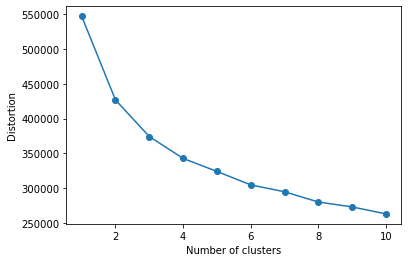

In [106]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='random', max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) 
    # Inertia is the sum of squared distances of samples to their closest cluster center.
    # Elbow method shows that the best K is 2 (probably 3 can be better)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [107]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(X)
labels = kmeans.labels_

In [108]:
X_cluster = pd.DataFrame(data_cluster)
X_cluster['kelompok'] = labels


In [109]:
X_cluster.groupby('kelompok').agg({'patient_financing':'count'}).reset_index()

,kelompok,patient_financing
0,0,48346
1,1,62681
2,2,56595


In [110]:
X_cluster.groupby(['kelompok']).agg({'Female':'mean','Male':'mean','Not smoking':'mean','Smoking':'mean',
                                'Flu':'mean','General examination':'mean','ISPA':'mean','Pencernaan':'mean',
                                'age 21 - 34':'mean','age 35 - 51':'mean', 'age <= 20':'mean','age > 51':'mean',
                                'Kemarau':'mean','Pancaroba':'mean', 'Penghujan':'mean','Bekasi':'mean',
                                'Kab. Lampung Tengah':'mean','Kota Jakarta Timur':'mean', 'Tangerang':'mean'
                               }).reset_index()

,kelompok,Female,Male,Not smoking,Smoking,Flu,General examination,ISPA,Pencernaan,age 21 - 34,age 35 - 51,age <= 20,age > 51,Kemarau,Pancaroba,Penghujan,Bekasi,Kab. Lampung Tengah,Kota Jakarta Timur,Tangerang
0,0,0.000000,1.000000,0.947524,0.052476,0.111571,0.002255,0.090328,0.064700,0.170169,0.240806,0.318454,0.270570,0.226947,0.409031,0.364022,0.467153,0.000290,0.046477,0.060232
1,1,0.532091,0.467909,0.976835,0.023165,0.056173,0.140026,0.049648,0.059540,0.307605,0.233835,0.244907,0.213653,0.232878,0.450471,0.316651,0.225443,0.059013,0.028637,0.017996
2,2,1.000000,0.000000,0.999258,0.000742,0.088276,0.002120,0.073823,0.083417,0.229384,0.265942,0.232777,0.271897,0.233554,0.399046,0.367400,0.470625,0.000477,0.044191,0.068787
